In [2174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

import math

import warnings
warnings.filterwarnings('ignore')

## Uploading the data

In [2175]:
def upload_data(data):
    spontan_list= [] 
    sync_list= []
    alone_list = []
    for participant in listdir(complete_data):
        for file in listdir(complete_data+participant+'/'):
            if file.endswith('Spontan.csv'):
                spontan=pd.read_csv(complete_data+participant+'/'+file)
            elif file.endswith('Sync.csv'):
                sync=pd.read_csv(complete_data+participant+'/'+file)
            elif file.endswith('Alone.csv'):
                alone=pd.read_csv(complete_data+participant+'/'+file)
        spontan_list.append(spontan)
        sync_list.append(sync)
        alone_list.append(alone)
    return spontan_list,sync_list,alone_list

In [2176]:
#train set
complete_data=(r'C:\Users\meirk\Desktop\final_project_files\finalProjectFiles\extraFiles\Training/')
spontan_list, sync_list ,alone_list = upload_data(complete_data)
print ("number of files is: ",len(spontan_list),',',len(sync_list),',',len(alone_list),
       "in spontan, sync and alone respectively")
#shapes of dfs
train_list = [spontan_list,sync_list,alone_list]
for list_ in train_list:
    for file in list_:
        print(file.shape)

number of files is:  9 , 9 , 9 in spontan, sync and alone respectively
(9054, 22)
(8998, 22)
(9050, 22)
(8937, 22)
(8826, 22)
(9054, 22)
(9054, 22)
(8773, 22)
(4375, 22)
(9052, 22)
(9054, 22)
(9039, 22)
(9050, 22)
(8395, 22)
(9046, 22)
(9054, 22)
(8829, 22)
(4500, 22)
(4526, 22)
(4575, 22)
(4482, 22)
(4527, 22)
(4931, 22)
(4526, 22)
(4468, 22)
(4537, 22)
(2250, 22)


In [2177]:
#validation set
complete_data=(r'C:\Users\meirk\Desktop\final_project_files\finalProjectFiles\extraFiles\Validation/')
spontan_list_val, sync_list_val ,alone_list_val = upload_data(complete_data)
print ("number of files in is: ",len(spontan_list),',',len(sync_list),',',len(alone_list),
       "in spontan, sync and alone respectively")
#shapes of dfs
validation_list = [spontan_list_val, sync_list_val ,alone_list_val]
for list_ in validation_list:
    for file in list_:
        print(file.shape)

number of files in is:  9 , 9 , 9 in spontan, sync and alone respectively
(8969, 22)
(8986, 22)
(4500, 22)
(8846, 22)
(8965, 22)
(4446, 22)
(4700, 22)
(4614, 22)
(2250, 22)


We uploaded the data (both training and validation sets) into 3 lists, one for each scenario. Each list contains 9 files, a file for each participant.

In [2178]:
#HandRight
right_hand = pd.read_csv(r'C:\Users\meirk\Desktop\final_project_files\finalProjectFiles\extraFiles\HandRight.csv')
right_hand.head()

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,128.2883,15478,right,1,15.67167,226.2064,20.26470,34.26665,-195.214700,-35.043020,...,-0.277800,46.88831,207.3548,86.23589,203.8337,49.33507,237.4553,0.0,0.206389,0.0
1,128.3048,15480,right,1,16.24119,222.9389,20.11781,36.16443,-180.093900,-4.052799,...,-0.277763,47.54861,205.6568,86.42250,203.9553,47.88272,238.4482,0.0,0.243050,0.0
2,128.3218,15482,right,1,16.72461,220.9709,19.94972,26.35298,-95.088190,-11.157620,...,-0.278792,48.15030,204.5182,86.35149,204.6231,45.35921,236.8544,0.0,0.281134,0.0
3,128.3384,15484,right,1,17.09016,219.7124,19.67679,19.46804,-61.755180,-21.303780,...,-0.279768,48.64175,203.9989,86.16056,204.9939,44.18692,236.0927,0.0,0.277691,0.0
4,128.3551,15486,right,1,17.46017,219.3652,19.13128,21.94964,-8.355943,-35.081790,...,-0.278629,48.93135,203.3777,85.59017,204.5952,42.68003,235.2896,0.0,0.283008,0.0


In [2179]:
right_hand.shape

(4812, 22)

## preprocessing

###### Search for NaN values

In [2180]:
nan_sum = 0
#train set
print("train set")
for list_ in train_list:
    for file in list_:
        nan_sum += file.isna().sum().sum()
print("number of NaN values in train set is: ",nan_sum)

#validation set
print("validation set")
validation_list = [spontan_list_val, sync_list_val ,alone_list_val]
for list_ in validation_list:
    for file in list_:
        nan_sum = file.isna().sum().sum()
print("number of NaN values in validation test is: ",nan_sum)

#right hand
print("right hand set")
print("number of NaN values in right hand set is: ",right_hand.isna().sum().sum())

train set
number of NaN values in train set is:  0
validation set
number of NaN values in validation test is:  0
right hand set
number of NaN values in right hand set is:  2304


right_hand  dataFrame has 2304 NaN values.

In [2181]:
right_hand.isna().sum()

Time                 0
 Frame ID            0
 Hand Type           0
 # hands             0
 Position X          0
 Position Y          0
 Position Z          0
 Velocity X          0
 Velocity Y          0
 Velocity Z          0
 Pitch               0
 Roll                0
 Yaw                 0
 Wrist Pos X       384
 Wrist Pos Y       384
 Wrist Pos Z       384
 Elbow pos X       384
 Elbow Pos Y       384
 Elbow Pos Z       384
 Grab Strenth        0
 Grab Angle          0
 Pinch Strength      0
dtype: int64

As we already saw, right hand df has 4812 values. Without NaN number it contains:

In [2182]:
print(len(right_hand.index) - len(right_hand.dropna().index))

384


384 frames contains NaN values, lets drop them.

In [2183]:
right_hand = right_hand.dropna()
len(right_hand.index)

4428

In [2184]:
right_hand.isna().sum()

Time               0
 Frame ID          0
 Hand Type         0
 # hands           0
 Position X        0
 Position Y        0
 Position Z        0
 Velocity X        0
 Velocity Y        0
 Velocity Z        0
 Pitch             0
 Roll              0
 Yaw               0
 Wrist Pos X       0
 Wrist Pos Y       0
 Wrist Pos Z       0
 Elbow pos X       0
 Elbow Pos Y       0
 Elbow Pos Z       0
 Grab Strenth      0
 Grab Angle        0
 Pinch Strength    0
dtype: int64

###### removing duplicate rows

In [2185]:
#train set
for list_ in train_list:
    for i in range(len(list_)):
        list_[i] = list_[i].drop_duplicates()

#validation set
for list_ in validation_list:
    for i in range(len(list_)):
        list_[i] = list_[i].drop_duplicates()

#right hand
right_hand = right_hand.drop_duplicates()

###### converting 'Hand Type' to ones - right and zeros - left

In [2186]:
def convert_to_1and0 (column):
    for index in range(len(column)):
        if column.loc[index] == 'right':
            column.loc[index] = 1
        else:
            column.loc[index] = 0    

In [2187]:
# train list
#spontan list
for i in range(len(spontan_list)):
    spontan_list[i][' Hand Type']= spontan_list[i][' Hand Type'].map({'right':1,'left':0})
    spontan_list[i][' Hand Type'] = pd.to_numeric(spontan_list[i][' Hand Type'], errors= 'coerce')
#sync list
for i in range(len(sync_list)):
    sync_list[i][' Hand Type'] = sync_list[i][' Hand Type'].map({'right':1,'left':0})
    sync_list[i][' Hand Type'] = pd.to_numeric(sync_list[i][' Hand Type'], errors= 'coerce')
#alone list
for i in range(len(alone_list)):
    alone_list[i][' Hand Type']=alone_list[i][' Hand Type'].map({'right':1,'left':0})
    alone_list[i][' Hand Type'] = pd.to_numeric(alone_list[i][' Hand Type'], errors= 'coerce')

#validation set
#spontan
for i in range(len(spontan_list_val)):
    spontan_list_val[i][' Hand Type']=spontan_list_val[i][' Hand Type'].map({'right':1,'left':0})
    spontan_list_val[i][' Hand Type'] = pd.to_numeric(spontan_list_val[i][' Hand Type'], errors= 'coerce')
#sync
for i in range(len(sync_list_val)):
    sync_list_val[i][' Hand Type']=sync_list_val[i][' Hand Type'].map({'right':1,'left':0})
    sync_list_val[i][' Hand Type'] = pd.to_numeric(sync_list_val[i][' Hand Type'], errors= 'coerce')
#alone
for i in range(len(alone_list_val)):
    alone_list_val[i][' Hand Type']=alone_list_val[i][' Hand Type'].map({'right':1,'left':0})
    alone_list_val[i][' Hand Type'] = pd.to_numeric(alone_list_val[i][' Hand Type'], errors= 'coerce')

#right hand set
right_hand[' Hand Type']=right_hand[' Hand Type'].map({'right':1,'left':0})
right_hand[' Hand Type'] = pd.to_numeric(right_hand[' Hand Type'], errors= 'coerce')

Checking on the train set if the method above worked as expected

In [2188]:
i = 1
#train set
for list_ in train_list:
    for df in list_:
        print("df number ",i)
        print(df[' Hand Type'].value_counts())
        i = i + 1

df number  1
0    4527
1    4527
Name:  Hand Type, dtype: int64
df number  2
0    4527
1    4471
Name:  Hand Type, dtype: int64
df number  3
0    4526
1    4524
Name:  Hand Type, dtype: int64
df number  4
0    4472
1    4465
Name:  Hand Type, dtype: int64
df number  5
0    4527
1    4299
Name:  Hand Type, dtype: int64
df number  6
0    4527
1    4527
Name:  Hand Type, dtype: int64
df number  7
0    4527
1    4527
Name:  Hand Type, dtype: int64
df number  8
1    4527
0    4246
Name:  Hand Type, dtype: int64
df number  9
1    2239
0    2136
Name:  Hand Type, dtype: int64
df number  10
0    4526
1    4526
Name:  Hand Type, dtype: int64
df number  11
0    4527
1    4527
Name:  Hand Type, dtype: int64
df number  12
0    4527
1    4512
Name:  Hand Type, dtype: int64
df number  13
0    4525
1    4525
Name:  Hand Type, dtype: int64
df number  14
1    4444
0    3951
Name:  Hand Type, dtype: int64
df number  15
1    4527
0    4519
Name:  Hand Type, dtype: int64
df number  16
0    4527
1    4527


It worked well.

In [2189]:
spontan_list[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9054 entries, 0 to 9053
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time             9054 non-null   float64
 1    Frame ID        9054 non-null   int64  
 2    Hand Type       9054 non-null   int64  
 3    # hands         9054 non-null   int64  
 4    Position X      9054 non-null   float64
 5    Position Y      9054 non-null   float64
 6    Position Z      9054 non-null   float64
 7    Velocity X      9054 non-null   float64
 8    Velocity Y      9054 non-null   float64
 9    Velocity Z      9054 non-null   float64
 10   Pitch           9054 non-null   float64
 11   Roll            9054 non-null   float64
 12   Yaw             9054 non-null   float64
 13   Wrist Pos X     9054 non-null   float64
 14   Wrist Pos Y     9054 non-null   float64
 15   Wrist Pos Z     9054 non-null   float64
 16   Elbow pos X     9054 non-null   float64
 17   Elbow Pos Y  

Hand Type was changed to int instead of Object.

###### Removing first 7 seconds

In [2190]:
def remove_7_seconds(df):
    time_to_drop = df['Time'][0]
    time_to_drop = time_to_drop + 7
    print("time to drop for df is ",time_to_drop)
    while df['Time'][0] < time_to_drop:
        df = df.drop(0, axis = 0)
    return df

In [2191]:
#train set
for list_ in train_list:
    for df in list_:
        time_to_drop = df['Time'][0]
        time_to_drop = time_to_drop + 7
        print("time to drop for df is ",time_to_drop)
        df_ = df.drop(df[df['Time']<time_to_drop].index, inplace=True)

#validation set
for list_ in validation_list:
    for df in list_:
        time_to_drop = df['Time'][0]
        time_to_drop = time_to_drop + 7
        print("time to drop for df is ",time_to_drop)
        df_ = df.drop(df[df['Time']<time_to_drop].index, inplace= True)

time to drop for df is  342.9984
time to drop for df is  392.3023
time to drop for df is  533.4969
time to drop for df is  382.6675
time to drop for df is  568.7278
time to drop for df is  386.7184
time to drop for df is  499.7171
time to drop for df is  182.5415
time to drop for df is  605.6176
time to drop for df is  434.231
time to drop for df is  613.8324
time to drop for df is  706.221
time to drop for df is  471.5643
time to drop for df is  654.2784
time to drop for df is  480.3199
time to drop for df is  701.4501
time to drop for df is  298.0203
time to drop for df is  788.3885
time to drop for df is  525.8087
time to drop for df is  503.0675
time to drop for df is  619.9247
time to drop for df is  295.7583
time to drop for df is  464.7846
time to drop for df is  568.4594
time to drop for df is  587.1392
time to drop for df is  393.9574
time to drop for df is  696.6486
time to drop for df is  779.2799
time to drop for df is  63.73743
time to drop for df is  823.9093
time to drop

In [2192]:
#right hand
time_to_drop = right_hand['Time'][0]
time_to_drop = time_to_drop + 7
print("time to drop for hand right df is ",time_to_drop)
right_hand = right_hand.drop(right_hand[right_hand['Time']<time_to_drop].index)

time to drop for hand right df is  135.2883


In [2193]:
#train set
for df in spontan_list:
    print(len(df))
for df in sync_list:
    print(len(df))
for df in alone_list:
    print(len(df))

#validation set
for df in spontan_list_val:
    print(len(df))
for df in sync_list_val:
    print(len(df))
for df in alone_list_val:
    print(len(df))

#right hand
print(len(right_hand))

8208
8152
8205
8146
8046
8208
8208
7927
3953
8206
8208
8193
8204
7549
8200
8208
7983
4078
4103
4152
4059
4104
4299
4103
4045
4129
2040
8208
8140
4078
8000
8119
4024
4277
4103
2039
4007


###### Taking each 5th row

In [2194]:
#train set
for i in range(len(spontan_list)):
    spontan_list[i] = spontan_list[i].iloc[::5, :]
for i in range(len(sync_list)):
    sync_list[i] = sync_list[i].iloc[::5, :]
for i in range(len(alone_list)):
    alone_list[i] = alone_list[i].iloc[::5, :]

#validation set
for i in range(len(spontan_list_val)):
    spontan_list_val[i] = spontan_list_val[i].iloc[::5, :]
for i in range(len(sync_list_val)):
    sync_list_val[i].iloc[::5, :]
for i in range(len(alone_list_val)):
    alone_list_val[i].iloc[::5, :]

#right hand
right_hand = right_hand.iloc[::5, :]

In [2195]:
#reindexing
#Reindexing dataFrames to start from 0
#right hand
right_hand.index = range(len(right_hand))

#train set
for df in spontan_list:
    df.index = range(len(df))
for df in sync_list:
    df.index = range(len(df))
for df in alone_list:
    df.index = range(len(df))

#validation set
for df in spontan_list_val:
    df.index = range(len(df))
for df in sync_list_val:
    df.index = range(len(df))
for df in alone_list_val:
    df.index = range(len(df))

In [2196]:
#check if it works correctly
for df in spontan_list:
    print(len(df))
for df in sync_list:
    print(len(df))
for df in alone_list:
    print(len(df))

#validation set
for df in spontan_list_val:
    print(len(df))
for df in sync_list_val:
    print(len(df))
for df in alone_list_val:
    print(len(df))

#right hand
print(len(right_hand))

1642
1631
1641
1630
1610
1642
1642
1586
791
1642
1642
1639
1641
1510
1640
1642
1597
816
821
831
812
821
860
821
809
826
408
1642
1628
816
8000
8119
4024
4277
4103
2039
802


it worked.

###### removing rowes with incorrect number of hands

In [2198]:
#spontan
for i in range(len(spontan_list)):
    spontan_copy = spontan_list[i].copy()
    spontan_list[i] = spontan_copy[spontan_copy[' # hands'] == 2]

for i in range(len(spontan_list_val)):
    spontan_copy = spontan_list_val[i].copy()
    spontan_list_val[i] = spontan_copy[spontan_copy[' # hands'] == 2]
    
#sync
for i in range(len(sync_list)):
    sync_copy = sync_list[i].copy()
    sync_list[i] = sync_copy[sync_copy[' # hands'] == 2]

for i in range(len(sync_list_val)):
    sync_copy = sync_list_val[i].copy()
    sync_list_val[i] = sync_copy[sync_copy[' # hands'] == 2]
    
#alone
for i in range(len(alone_list)):
    alone_copy = alone_list[i].copy()
    alone_list[i] = alone_copy[alone_copy[' # hands'] == 1]
    
for i in range(len(alone_list_val)):
    alone_copy = alone_list_val[i].copy()
    alone_list_val[i] = alone_copy[alone_copy[' # hands'] == 1]
    
#right hand
right_hand = right_hand[right_hand[' Hand Type'] == 1]

In [2199]:
#reindexing again!
#Reindexing dataFrames to start from 0
#right hand
right_hand.index = range(len(right_hand))
#train set
for df in spontan_list:
    df.index = range(len(df))
for df in sync_list:
    df.index = range(len(df))
for df in alone_list:
    df.index = range(len(df))
#validation set
for df in spontan_list_val:
    df.index = range(len(df))
for df in sync_list_val:
    df.index = range(len(df))
for df in alone_list_val:
    df.index = range(len(df))

###### Merging alone and right hand

In [2201]:
#training
right_hand_expand = right_hand
for i in range(len(alone_list)):    
    while (len(right_hand_expand) < len(alone_list[i])): 
        right_hand_expand = pd.concat([right_hand_expand, right_hand], ignore_index = True)
    rows_to_drop = len(right_hand_expand) - len(alone_list[i]) 
    
    right_hand_expand.drop(right_hand_expand.tail(rows_to_drop).index, inplace = True)
    right_hand_expand = right_hand_expand.reset_index() 
    right_hand_expand = right_hand_expand.drop(['index'], axis = 1)
    
    alone_list[i] = pd.concat([right_hand_expand, alone_list[i]]).sort_index(kind='merge') #merging
    alone_list[i] = alone_list[i].reset_index() #reindexing
    alone_list[i] = alone_list[i].drop(['index'], axis = 1)

#validation
right_hand_expand = right_hand
for i in range(len(alone_list_val)):    
    while (len(right_hand_expand) < len(alone_list_val[i])): 
        right_hand_expand = pd.concat([right_hand_expand, right_hand], ignore_index = True)
    rows_to_drop = len(right_hand_expand) - len(alone_list_val[i]) 
    
    right_hand_expand.drop(right_hand_expand.tail(rows_to_drop).index, inplace = True)
    right_hand_expand = right_hand_expand.reset_index() 
    right_hand_expand = right_hand_expand.drop(['index'], axis = 1)
    
    alone_list_val[i] = pd.concat([right_hand_expand, alone_list_val[i]]).sort_index(kind='merge') #merging
    alone_list_val[i] = alone_list_val[i].reset_index() #reindexing
    alone_list_val[i] = alone_list_val[i].drop(['index'], axis = 1)

#### Combining all dataFrames into one

Untill this moment I worked with lists of dataFrames, now I will merge them all to one dataFrame according scenario- spontan, sync and alone

In [2203]:
#making dataFrame for each scenario

#train set
#spontan
spontan_list_final = []
for i in range(len(spontan_list)):
    spontan_list_final.append(spontan_list[i])
spontan_final = pd.concat(spontan_list_final)
#sync
sync_list_final = []
for i in range(len(sync_list)):
    sync_list_final.append(sync_list[i])
sync_final = pd.concat(sync_list_final)
#alone
alone_list_final = []
for i in range(len(alone_list)):
    alone_list_final.append(alone_list[i])
alone_final = pd.concat(alone_list_final)

#validation set
#spontan
spontan_list_final_val = []
for i in range(len(spontan_list_val)):
    spontan_list_final_val.append(spontan_list_val[i])
spontan_final_val = pd.concat(spontan_list_final_val)
#sync
sync_list_final_val = []
for i in range(len(sync_list_val)):
    sync_list_final_val.append(sync_list_val[i])
sync_final_val = pd.concat(sync_list_final_val)
#alone
alone_list_final_val = []
for i in range(len(alone_list_val)):
    alone_list_final_val.append(alone_list_val[i])
alone_final_val = pd.concat(alone_list_final_val)

In [2204]:
#labeling- spontan=0,sync=1,alone=2
#Training
spontan_final['label'] = 0
sync_final['label'] = 1
alone_final['label'] = 2

#validation
spontan_final_val['label'] = 0
sync_final_val['label'] = 1
alone_final_val['label'] = 2

In [2205]:
#concat them together
full_data = pd.concat([spontan_final,sync_final,alone_final])
full_validation = pd.concat([spontan_final_val,sync_final_val,alone_final_val])

###### removing uneeded features

I decided to remove 'Time' and 'Frame ID' for the reason those features don't provide any important information which can help classifiers classifie better. 
<br>In addition I'm dropping '#hands' feature for the reason it can make classifiers overfit when predicting 'alone' scenario, as all this class are values of 1, and other classes have 2.

In [2206]:
full_data = full_data.drop(['Time',' Frame ID'], axis=1)
full_validation = full_validation.drop(['Time',' Frame ID'], axis =1)

In [2207]:
full_data.isnull().sum()

 Hand Type         0
 # hands           0
 Position X        0
 Position Y        0
 Position Z        0
 Velocity X        0
 Velocity Y        0
 Velocity Z        0
 Pitch             0
 Roll              0
 Yaw               0
 Wrist Pos X       0
 Wrist Pos Y       0
 Wrist Pos Z       0
 Elbow pos X       0
 Elbow Pos Y       0
 Elbow Pos Z       0
 Grab Strenth      0
 Grab Angle        0
 Pinch Strength    0
label              0
dtype: int64

## Steps before modeling

###### Splitting the data

In [2208]:
#train
data = full_data.drop(['label'],axis = 1)
target = full_data['label']

#validation
data_val = full_validation.drop(['label'], axis = 1)
target_val = full_validation['label']

###### Scaling

In [2209]:
scaler = StandardScaler()
data = scaler.fit_transform(data)
val_data_scaled = scaler.transform(data_val)

## Modeling
I am going to build some modes using different algortihms. I am going to check each algorithm on several number of dimension using PCA as the following- 0.85,0.9,0.95.

<br>The steps of each train will be:
* PCA.
* showing number of features and looking at the varaiance ratio.
* fit, predict and scores.


<br>**Note:** I also tried n_components of 0.8, but the results were almost the same as with 0.85 (minor diffrence) so I drop it.

### 0.85

In [2211]:
pca_85 = PCA(n_components=0.85)
data_85 = pca_85.fit_transform(data)
x_train_85, x_test_85, y_train_85, y_test_85 = train_test_split(data_85, target, test_size=0.2, random_state=0)

print("number of features of pca_85 is: ",pd.DataFrame(data=data_85).columns.size)
print(x_train_85.shape)

number of features of pca_85 is:  9
(32859, 9)


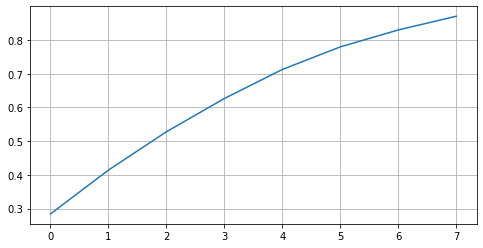

In [2301]:
cumsum = np.cumsum(pca_85.explained_variance_ratio_)
plt.figure(figsize=(8,4))
plt.plot(cumsum)
plt.grid(which = 'both')

0.8830188679245283
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      2716
           1       0.81      0.83      0.82      2684
           2       1.00      1.00      1.00      2815

    accuracy                           0.88      8215
   macro avg       0.88      0.88      0.88      8215
weighted avg       0.88      0.88      0.88      8215



Text(0.5, 1.0, 'Confusion matrix knn')

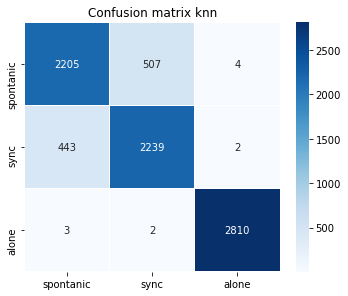

In [2213]:
#knn
knn_85 = KNeighborsClassifier()
knn_85.fit(x_train_85,y_train_85)
knn_85pred= knn_85.predict(x_test_85)

#scores
f1_knn_85 = f1_score(y_true=y_test_85,y_pred=knn_85pred,average='weighted')
print(accuracy_score(y_true=y_test_85,y_pred=knn_85pred))
print(classification_report(y_true= y_test_85, y_pred = knn_85pred))

#confusion matriax
plt.figure(figsize=(5,4))
cnf_mat = confusion_matrix(y_true=y_test_85, y_pred=knn_85pred)

axis_labels = ['spontanic', 'sync', 'alone']
sns.heatmap(pd.DataFrame(cnf_mat), annot=True,cmap="Blues" , fmt='g', xticklabels=axis_labels, yticklabels=axis_labels, linewidths=0.1)

plt.tight_layout()
plt.title('Confusion matrix knn')

0.8870359099208764
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      2716
           1       0.83      0.83      0.83      2684
           2       1.00      1.00      1.00      2815

    accuracy                           0.89      8215
   macro avg       0.89      0.89      0.89      8215
weighted avg       0.89      0.89      0.89      8215



Text(0.5, 1.0, 'Confusion matrix random forest')

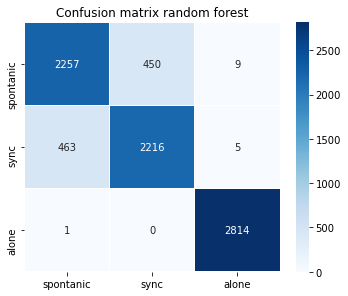

In [2214]:
#Random forest
rnd_85 = RandomForestClassifier(n_estimators=200, n_jobs=-1)
rnd_85.fit(x_train_85,y_train_85)
rnd_85pred = rnd_85.predict(x_test_85)

#scores
f1_rnd_85 = f1_score(y_true=y_test_85,y_pred=rnd_85pred,average='weighted')
print(accuracy_score(y_true=y_test_85,y_pred=rnd_85pred))
print(classification_report(y_true= y_test_85, y_pred = rnd_85pred))

#confusion matriax
plt.figure(figsize=(5,4))
cnf_mat = confusion_matrix(y_true=y_test_85, y_pred=rnd_85pred)

axis_labels = ['spontanic', 'sync', 'alone']
sns.heatmap(pd.DataFrame(cnf_mat), annot=True,cmap="Blues" , fmt='g', xticklabels=axis_labels, yticklabels=axis_labels, linewidths=0.1)

plt.tight_layout()
plt.title('Confusion matrix random forest')


0.8690200852099818
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      2716
           1       0.81      0.79      0.80      2684
           2       1.00      1.00      1.00      2815

    accuracy                           0.87      8215
   macro avg       0.87      0.87      0.87      8215
weighted avg       0.87      0.87      0.87      8215



Text(0.5, 1.0, 'Confusion matrix XGBoost')

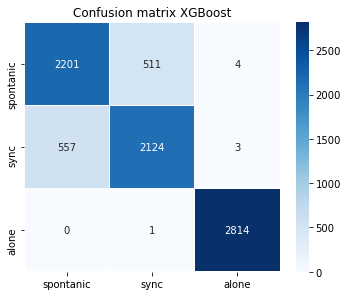

In [2215]:
#xgb
xgb_85 = XGBClassifier(eval_metric = 'mlogloss')
xgb_85.fit(x_train_85,y_train_85)
xgb_85pred = xgb_85.predict(x_test_85)

#scores
f1_xgb_85 = f1_score(y_true=y_test_85,y_pred=xgb_85pred,average='weighted')
print(accuracy_score(y_true=y_test_85,y_pred=xgb_85pred))
print(classification_report(y_true= y_test_85, y_pred = xgb_85pred))

#confusion matriax
plt.figure(figsize=(5,4))
cnf_mat = confusion_matrix(y_true=y_test_85, y_pred=xgb_85pred)

axis_labels = ['spontanic', 'sync', 'alone']
sns.heatmap(pd.DataFrame(cnf_mat), annot=True,cmap="Blues" , fmt='g', xticklabels=axis_labels, yticklabels=axis_labels, linewidths=0.1)

plt.tight_layout()
plt.title('Confusion matrix XGBoost')

0.8099817407181984
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      2716
           1       0.72      0.72      0.72      2684
           2       0.98      0.98      0.98      2815

    accuracy                           0.81      8215
   macro avg       0.81      0.81      0.81      8215
weighted avg       0.81      0.81      0.81      8215



Text(0.5, 1.0, 'Confusion matrix knn')

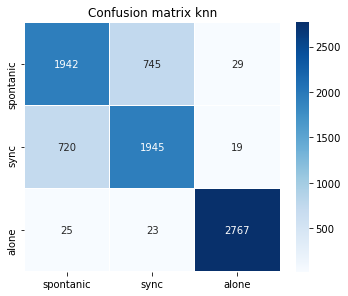

In [2216]:
#AdaBoost
ada_85 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
ada_85.fit(x_train_85,y_train_85)
ada_85pred = ada_85.predict(x_test_85)

#scores
f1_ada_85 = f1_score(y_true=y_test_85,y_pred=ada_85pred,average='weighted')
print(accuracy_score(y_true=y_test_85,y_pred=ada_85pred))
print(classification_report(y_true= y_test_85, y_pred = ada_85pred))

#confusion matriax
plt.figure(figsize=(5,4))
cnf_mat = confusion_matrix(y_true=y_test_85, y_pred=ada_85pred)

axis_labels = ['spontanic', 'sync', 'alone']
sns.heatmap(pd.DataFrame(cnf_mat), annot=True,cmap="Blues" , fmt='g', xticklabels=axis_labels, yticklabels=axis_labels, linewidths=0.1)

plt.tight_layout()
plt.title('Confusion matrix knn')

0.8936092513694461
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2716
           1       0.84      0.83      0.84      2684
           2       1.00      1.00      1.00      2815

    accuracy                           0.89      8215
   macro avg       0.89      0.89      0.89      8215
weighted avg       0.89      0.89      0.89      8215



Text(0.5, 1.0, 'Confusion matrix stacking')

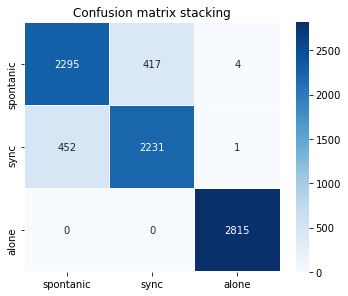

In [2217]:
#stacking
stack_85 = StackingClassifier(estimators=[('knn',knn_85),('rnd',rnd_85),('xgb',xgb_85),('ada',ada_85)], final_estimator=xgb_85)
stack_85.fit(x_train_85,y_train_85)
stack_85pred = stack_85.predict(x_test_85)

#scores
f1_stack_85 = f1_score(y_true=y_test_85,y_pred=stack_85pred, average='weighted')
print(accuracy_score(y_true=y_test_85,y_pred=stack_85pred))
print(classification_report(y_true= y_test_85, y_pred = stack_85pred))

#confusion matriax
plt.figure(figsize=(5,4))
cnf_mat = confusion_matrix(y_true=y_test_85, y_pred=stack_85pred)

axis_labels = ['spontanic', 'sync', 'alone']
sns.heatmap(pd.DataFrame(cnf_mat), annot=True,cmap="Blues" , fmt='g', xticklabels=axis_labels, yticklabels=axis_labels, linewidths=0.1)

plt.tight_layout()
plt.title('Confusion matrix stacking')

In [2218]:
print("knn f1 score: ", f1_knn_85)
print("rnd f1 score: ", f1_rnd_85)
print("xgb f1 score: ", f1_xgb_85)
print("ada f1 score: ", f1_ada_85)
print("stack f1 score: ", f1_stack_85)

knn f1 score:  0.882997671240778
rnd f1 score:  0.8869016903006915
xgb f1 score:  0.8689325258774184
ada f1 score:  0.8099783678470939
stack f1 score:  0.8935535203630118


Stacking classifier f1 score is the highest score of 0.85 with 89.3%.

### 0.9

In [2219]:
pca_90 = PCA(n_components=0.9)
data_90 = pca_90.fit_transform(data)
x_train_90, x_test_90, y_train_90, y_test_90 = train_test_split(data_90, target, test_size=0.2, random_state=0)

print("number of features of pca_90 is: ",pd.DataFrame(data=data_90).columns.size)
print(x_train_90.shape)

number of features of pca_90 is:  10
(32859, 10)


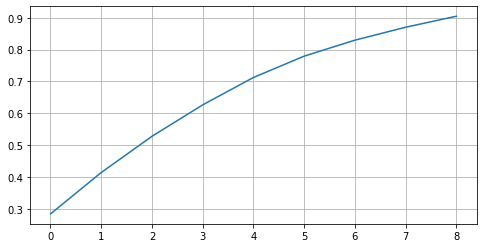

In [2300]:
cumsum = np.cumsum(pca_90.explained_variance_ratio_)
plt.figure(figsize=(8,4))
plt.plot(cumsum)
plt.grid(which = 'both')

0.911503347534997
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      2716
           1       0.86      0.87      0.87      2684
           2       1.00      1.00      1.00      2815

    accuracy                           0.91      8215
   macro avg       0.91      0.91      0.91      8215
weighted avg       0.91      0.91      0.91      8215



Text(0.5, 1.0, 'Confusion matrix knn')

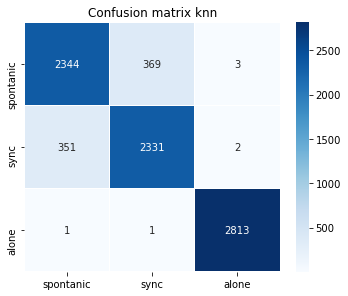

In [2221]:
#knn
knn_90 = KNeighborsClassifier()
knn_90.fit(x_train_90,y_train_90)
knn_90pred= knn_90.predict(x_test_90)

#scores
f1_knn_90 = f1_score(y_true=y_test_90,y_pred=knn_90pred, average='weighted')
print(accuracy_score(y_true=y_test_90,y_pred=knn_90pred))
print(classification_report(y_true= y_test_90, y_pred = knn_90pred))

#confusion matriax
plt.figure(figsize=(5,4))
cnf_mat = confusion_matrix(y_true=y_test_90, y_pred=knn_90pred)

axis_labels = ['spontanic', 'sync', 'alone']
sns.heatmap(pd.DataFrame(cnf_mat), annot=True,cmap="Blues" , fmt='g', xticklabels=axis_labels, yticklabels=axis_labels, linewidths=0.1)

plt.tight_layout()
plt.title('Confusion matrix knn')

0.9195374315276933
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2716
           1       0.89      0.87      0.88      2684
           2       1.00      1.00      1.00      2815

    accuracy                           0.92      8215
   macro avg       0.92      0.92      0.92      8215
weighted avg       0.92      0.92      0.92      8215



Text(0.5, 1.0, 'Confusion matrix random forest')

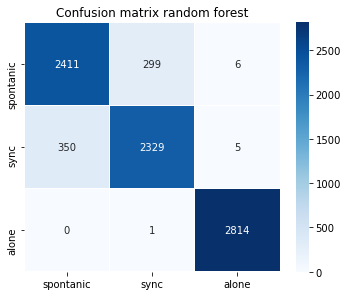

In [2222]:
#Random forest
rnd_90 = RandomForestClassifier(n_estimators=200, n_jobs=-1)
rnd_90.fit(x_train_90,y_train_90)
rnd_90pred = rnd_90.predict(x_test_90)

#scores
f1_rnd_90 = f1_score(y_true=y_test_90,y_pred=rnd_90pred, average='weighted')
print(accuracy_score(y_true=y_test_90,y_pred=rnd_90pred))
print(classification_report(y_true= y_test_90, y_pred = rnd_90pred))

#confusion matriax
plt.figure(figsize=(5,4))
cnf_mat = confusion_matrix(y_true=y_test_90, y_pred=rnd_90pred)

axis_labels = ['spontanic', 'sync', 'alone']
sns.heatmap(pd.DataFrame(cnf_mat), annot=True,cmap="Blues" , fmt='g', xticklabels=axis_labels, yticklabels=axis_labels, linewidths=0.1)

plt.tight_layout()
plt.title('Confusion matrix random forest')

0.900060864272672
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      2716
           1       0.86      0.83      0.85      2684
           2       1.00      1.00      1.00      2815

    accuracy                           0.90      8215
   macro avg       0.90      0.90      0.90      8215
weighted avg       0.90      0.90      0.90      8215



Text(0.5, 1.0, 'Confusion matrix XGBoost')

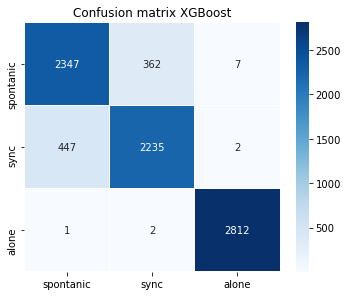

In [2223]:
xgb_90 = XGBClassifier(eval_metric = 'mlogloss')
xgb_90.fit(x_train_90,y_train_90)
xgb_90pred = xgb_90.predict(x_test_90)

#scores
f1_xgb_90 = f1_score(y_true=y_test_90,y_pred=xgb_90pred, average='weighted')
print(accuracy_score(y_true=y_test_90,y_pred=xgb_90pred))
print(classification_report(y_true= y_test_90, y_pred = xgb_90pred))

#confusion matriax
plt.figure(figsize=(5,4))
cnf_mat = confusion_matrix(y_true=y_test_90, y_pred=xgb_90pred)

axis_labels = ['spontanic', 'sync', 'alone']
sns.heatmap(pd.DataFrame(cnf_mat), annot=True,cmap="Blues" , fmt='g', xticklabels=axis_labels, yticklabels=axis_labels, linewidths=0.1)

plt.tight_layout()
plt.title('Confusion matrix XGBoost')

0.8503956177723676
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      2716
           1       0.78      0.78      0.78      2684
           2       0.98      0.98      0.98      2815

    accuracy                           0.85      8215
   macro avg       0.85      0.85      0.85      8215
weighted avg       0.85      0.85      0.85      8215



Text(0.5, 1.0, 'Confusion matrix knn')

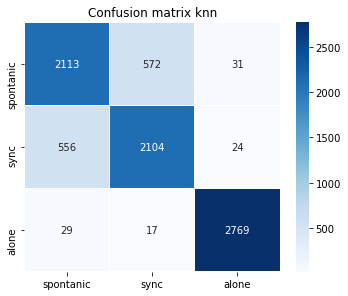

In [2224]:
#AdaBoost
ada_90 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
ada_90.fit(x_train_90,y_train_90)
ada_90pred = ada_90.predict(x_test_90)

#scores
f1_ada_90 = f1_score(y_true=y_test_90,y_pred=ada_90pred, average='weighted')
print(accuracy_score(y_true=y_test_90,y_pred=ada_90pred))
print(classification_report(y_true= y_test_90, y_pred = ada_90pred))

#confusion matriax
plt.figure(figsize=(5,4))
cnf_mat = confusion_matrix(y_true=y_test_90, y_pred=ada_90pred)

axis_labels = ['spontanic', 'sync', 'alone']
sns.heatmap(pd.DataFrame(cnf_mat), annot=True,cmap="Blues" , fmt='g', xticklabels=axis_labels, yticklabels=axis_labels, linewidths=0.1)

plt.tight_layout()
plt.title('Confusion matrix knn')

0.9242848447961047
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      2716
           1       0.89      0.88      0.88      2684
           2       1.00      1.00      1.00      2815

    accuracy                           0.92      8215
   macro avg       0.92      0.92      0.92      8215
weighted avg       0.92      0.92      0.92      8215



Text(0.5, 1.0, 'Confusion matrix stacking')

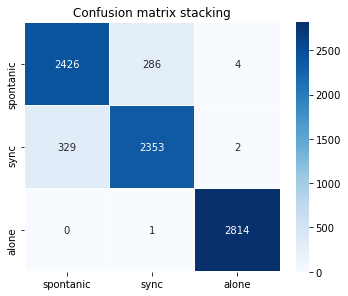

In [2225]:
#stacking
stack_90 = StackingClassifier(estimators=[('knn',knn_90),('rnd',rnd_90),('xgb',xgb_90),('ada',ada_90)], final_estimator=xgb_90)
stack_90.fit(x_train_90,y_train_90)
stack_90pred = stack_90.predict(x_test_90)

#scores
f1_stack_90 = f1_score(y_true=y_test_90,y_pred=stack_90pred, average='weighted')
print(accuracy_score(y_true=y_test_90,y_pred=stack_90pred))
print(classification_report(y_true= y_test_90, y_pred = stack_90pred))

#confusion matriax
plt.figure(figsize=(5,4))
cnf_mat = confusion_matrix(y_true=y_test_90, y_pred=stack_90pred)

axis_labels = ['spontanic', 'sync', 'alone']
sns.heatmap(pd.DataFrame(cnf_mat), annot=True,cmap="Blues" , fmt='g', xticklabels=axis_labels, yticklabels=axis_labels, linewidths=0.1)

plt.tight_layout()
plt.title('Confusion matrix stacking')

In [2226]:
print("knn f1 score: ", f1_knn_90)
print("rnd f1 score: ", f1_rnd_90)
print("xgb f1 score: ", f1_xgb_90)
print("ada f1 score: ", f1_ada_90)
print("stack f1 score: ", f1_stack_90)

knn f1 score:  0.9114796496310686
rnd f1 score:  0.9194535808921224
xgb f1 score:  0.8999783205471342
ada f1 score:  0.8502841208885524
stack f1 score:  0.9242429283021762


Again, stacking classifier f1 score is the highest score of 0.9 with 92.4%.

### 0.95

In [2227]:
pca_95 = PCA(n_components=0.95)
data_95 = pca_95.fit_transform(data)
x_train_95, x_test_95, y_train_95, y_test_95 = train_test_split(data_95, target, test_size=0.2, random_state=1)

print("number of features of pca_95 is: ",pd.DataFrame(data=data_95).columns.size)
print(x_train_95.shape)

number of features of pca_95 is:  12
(32859, 12)


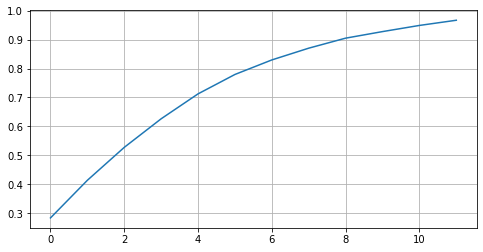

In [2302]:
cumsum = np.cumsum(pca_95.explained_variance_ratio_)
plt.figure(figsize=(8,4))
plt.plot(cumsum)
plt.grid(which = 'both')

0.9129640900791236
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2779
           1       0.86      0.88      0.87      2723
           2       1.00      1.00      1.00      2713

    accuracy                           0.91      8215
   macro avg       0.91      0.91      0.91      8215
weighted avg       0.91      0.91      0.91      8215



Text(0.5, 1.0, 'Confusion matrix knn')

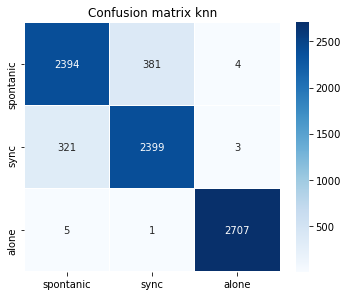

In [2229]:
#knn
knn_95 = KNeighborsClassifier()
knn_95.fit(x_train_95,y_train_95)
knn_95pred= knn_95.predict(x_test_95)

#scores
f1_knn_95 = f1_score(y_true=y_test_95,y_pred=knn_95pred, average='weighted')
print(accuracy_score(y_true=y_test_95,y_pred=knn_95pred))
print(classification_report(y_true= y_test_95, y_pred = knn_95pred))

#confusion matriax
plt.figure(figsize=(5,4))
cnf_mat = confusion_matrix(y_true=y_test_95, y_pred=knn_95pred)

axis_labels = ['spontanic', 'sync', 'alone']
sns.heatmap(pd.DataFrame(cnf_mat), annot=True,cmap="Blues" , fmt='g', xticklabels=axis_labels, yticklabels=axis_labels, linewidths=0.1)

plt.tight_layout()
plt.title('Confusion matrix knn')

0.9276932440657334
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      2779
           1       0.90      0.89      0.89      2723
           2       1.00      1.00      1.00      2713

    accuracy                           0.93      8215
   macro avg       0.93      0.93      0.93      8215
weighted avg       0.93      0.93      0.93      8215



Text(0.5, 1.0, 'Confusion matrix random forest')

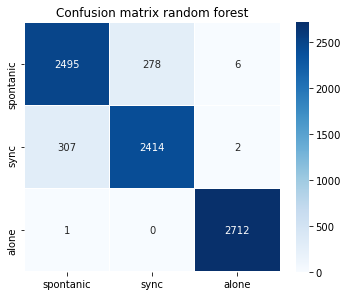

In [2230]:
#Random forest
rnd_95 = RandomForestClassifier(n_estimators=200, n_jobs=-1)
rnd_95.fit(x_train_95,y_train_95)
rnd_95pred = rnd_95.predict(x_test_95)

#scores
f1_rnd_95 = f1_score(y_true=y_test_95,y_pred=rnd_95pred, average='weighted')
print(accuracy_score(y_true=y_test_95,y_pred=rnd_95pred))
print(classification_report(y_true= y_test_95, y_pred = rnd_95pred))

#confusion matriax
plt.figure(figsize=(5,4))
cnf_mat = confusion_matrix(y_true=y_test_95, y_pred=rnd_95pred)

axis_labels = ['spontanic', 'sync', 'alone']
sns.heatmap(pd.DataFrame(cnf_mat), annot=True,cmap="Blues" , fmt='g', xticklabels=axis_labels, yticklabels=axis_labels, linewidths=0.1)

plt.tight_layout()
plt.title('Confusion matrix random forest')

0.9146682897139379
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2779
           1       0.88      0.86      0.87      2723
           2       1.00      1.00      1.00      2713

    accuracy                           0.91      8215
   macro avg       0.92      0.91      0.92      8215
weighted avg       0.91      0.91      0.91      8215



Text(0.5, 1.0, 'Confusion matrix XGBoost')

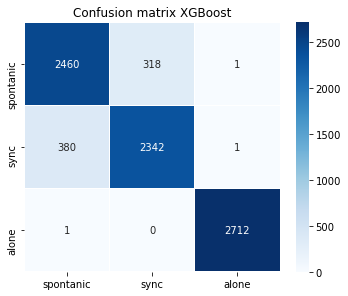

In [2231]:
xgb_95 = XGBClassifier(eval_metric = 'mlogloss')
xgb_95.fit(x_train_95,y_train_95)
xgb_95pred = xgb_95.predict(x_test_95)

#scores
f1_xgb_95 = f1_score(y_true=y_test_95,y_pred=xgb_95pred, average='weighted')
print(accuracy_score(y_true=y_test_95,y_pred=xgb_95pred))
print(classification_report(y_true= y_test_95, y_pred = xgb_95pred))

#confusion matriax
plt.figure(figsize=(5,4))
cnf_mat = confusion_matrix(y_true=y_test_95, y_pred=xgb_95pred)

axis_labels = ['spontanic', 'sync', 'alone']
sns.heatmap(pd.DataFrame(cnf_mat), annot=True,cmap="Blues" , fmt='g', xticklabels=axis_labels, yticklabels=axis_labels, linewidths=0.1)

plt.tight_layout()
plt.title('Confusion matrix XGBoost')

0.8534388314059647
              precision    recall  f1-score   support

           0       0.79      0.78      0.79      2779
           1       0.79      0.80      0.79      2723
           2       0.98      0.98      0.98      2713

    accuracy                           0.85      8215
   macro avg       0.85      0.85      0.85      8215
weighted avg       0.85      0.85      0.85      8215



Text(0.5, 1.0, 'Confusion matrix knn')

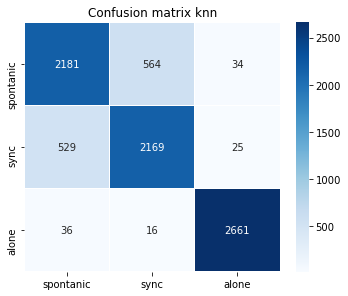

In [2232]:
#AdaBoost
ada_95 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
ada_95.fit(x_train_95,y_train_95)
ada_95pred = ada_95.predict(x_test_95)

#scores
f1_ada_95 = f1_score(y_true=y_test_95,y_pred=ada_95pred, average='weighted')
print(accuracy_score(y_true=y_test_95,y_pred=ada_95pred))
print(classification_report(y_true= y_test_95, y_pred = ada_95pred))

#confusion matriax
plt.figure(figsize=(5,4))
cnf_mat = confusion_matrix(y_true=y_test_95, y_pred=ada_95pred)

axis_labels = ['spontanic', 'sync', 'alone']
sns.heatmap(pd.DataFrame(cnf_mat), annot=True,cmap="Blues" , fmt='g', xticklabels=axis_labels, yticklabels=axis_labels, linewidths=0.1)

plt.tight_layout()
plt.title('Confusion matrix knn')

0.9321972002434571
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2779
           1       0.90      0.89      0.90      2723
           2       1.00      1.00      1.00      2713

    accuracy                           0.93      8215
   macro avg       0.93      0.93      0.93      8215
weighted avg       0.93      0.93      0.93      8215



Text(0.5, 1.0, 'Confusion matrix stacking')

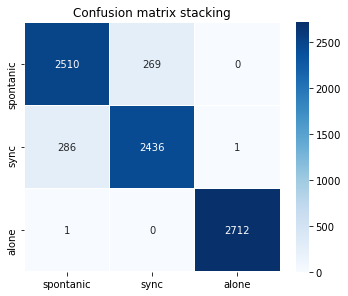

In [2233]:
#stacking
stack_95 = StackingClassifier(estimators=[('knn',knn_95),('rnd',rnd_95),('xgb',xgb_95),('ada',ada_95)], final_estimator=xgb_95)
stack_95.fit(x_train_95,y_train_95)
stack_95pred = stack_95.predict(x_test_95)

#scores
f1_stack_95 = f1_score(y_true=y_test_95,y_pred=stack_95pred, average='weighted')
print(accuracy_score(y_true=y_test_95,y_pred=stack_95pred))
print(classification_report(y_true= y_test_95, y_pred = stack_95pred))

#confusion matriax
plt.figure(figsize=(5,4))
cnf_mat = confusion_matrix(y_true=y_test_95, y_pred=stack_95pred)

axis_labels = ['spontanic', 'sync', 'alone']
sns.heatmap(pd.DataFrame(cnf_mat), annot=True,cmap="Blues" , fmt='g', xticklabels=axis_labels, yticklabels=axis_labels, linewidths=0.1)

plt.tight_layout()
plt.title('Confusion matrix stacking')

In [2234]:
print("knn f1 score: ", f1_knn_95)
print("rnd f1 score: ", f1_rnd_95)
print("xgb f1 score: ", f1_xgb_95)
print("ada f1 score: ", f1_ada_95)
print("stack f1 score: ", f1_stack_95)

knn f1 score:  0.912952744842224
rnd f1 score:  0.9276443359654428
xgb f1 score:  0.9146404271755421
ada f1 score:  0.8533526930897298
stack f1 score:  0.9321942216663684


Stacking classifier f1 score is the highest score of 0.95.

###### Which is the best classifier?

In [2237]:
print("Stacking classifier of 0.85 PCA is: ", f1_stack_85)
print("Stacking classifier of 0.9 PCA is: ", f1_stack_90)
print("Stacking classifier of 0.95 PCA is: ", f1_stack_95)

Stacking classifier of 0.85 PCA is:  0.8935535203630118
Stacking classifier of 0.9 PCA is:  0.9242429283021762
Stacking classifier of 0.95 PCA is:  0.9321942216663684


**As can be seen, the best classifier is Stacking with 0.95 components that are 12 features (out of 20) with f1 score of 93%.**

<br>Now it's time to evaluate the model with our test set, let's see what we get:

In [2236]:
#PCA in order to adopt val data to train data's dimension 
data_val_95 = pca_95.transform(val_data_scaled)

#last presdiction
pred_ = knn_95.predict(data_val_95)
print(f1_score(y_pred=pred_, y_true=target_val,average='weighted'))

0.8570039763272146


**Our best model perform not bad on the validation set- 85%!** 